# **Generative Modeling**

* AutoEncoder
* GAN

## **AutoEncoder**

* Encoder
* Latent Space
* Decoder

### **Vanilla AutoEncoder**

Loading a MNIST data and recostructing the original images

In [2]:
# loading the libraries

import tensorflow as tf
import keras
from keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the mnist data

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# shape of data

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# scaling and reshaping

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [8]:
# defining autoencoder model

input_img = keras.Input(shape=(28, 28, 1))
# encoder
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
encoded = layers.Dense(32, activation='relu')(x) # latent space
# decoder
x = layers.Dense(64, activation='relu')(encoded)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(28*28, activation='sigmoid')(x)
decoded = layers.Reshape((28, 28, 1))(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(
    optimizer='adam',
    loss='mse'
)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# train the autoencoder

autoencoder.fit(
    x_train, x_train,
    epochs = 10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0748 - val_loss: 0.0258
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0244 - val_loss: 0.0198
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0193 - val_loss: 0.0166
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0166 - val_loss: 0.0149
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0150 - val_loss: 0.0136
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0137 - val_loss: 0.0127
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0128 - val_loss: 0.0120
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0114 - val_loss: 0.0108
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0109 - val_loss: 0.0103


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


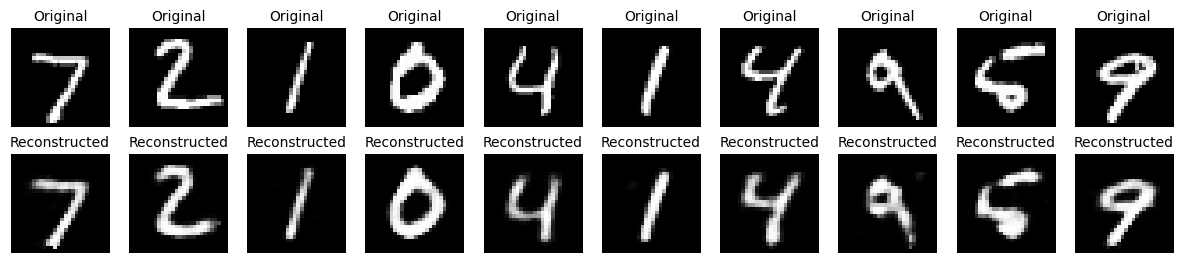

In [15]:
# visualize the original and reconstruction


reconstructed = autoencoder.predict(x_test[:10])

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
  axes[0, i].imshow(x_test[i].squeeze(), cmap='gray')
  axes[0, i].axis('off')
  axes[0, i].set_title('Original', fontsize=10)

  axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
  axes[1, i].axis('off')
  axes[1, i].set_title('Reconstructed', fontsize=10)

plt.show()

### **Denoising AutoEncoders**

In [16]:
# importing libraries
import tensorflow as tf
import keras
from keras import layers

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# loading the data

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [18]:
# shape of the data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
# Normalize and reshape

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [20]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [22]:
# add random noise

noise_factor = 0.5
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [23]:
# clip the values
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [24]:
# defining autoencoder model

input_img = keras.Input(shape=(28, 28, 1))
# encoder
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
encoded = layers.Dense(32, activation='relu')(x) # latent space
# decoder
x = layers.Dense(64, activation='relu')(encoded)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(28*28, activation='sigmoid')(x)
decoded = layers.Reshape((28, 28, 1))(x)

denoise_autoencoder = keras.Model(input_img, decoded)
denoise_autoencoder.compile(
    optimizer='adam',
    loss='mse'
)
denoise_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# training

denoise_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=5,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0768 - val_loss: 0.0379
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0360 - val_loss: 0.0307
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0305 - val_loss: 0.0283
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0280 - val_loss: 0.0262
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0261 - val_loss: 0.0248


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


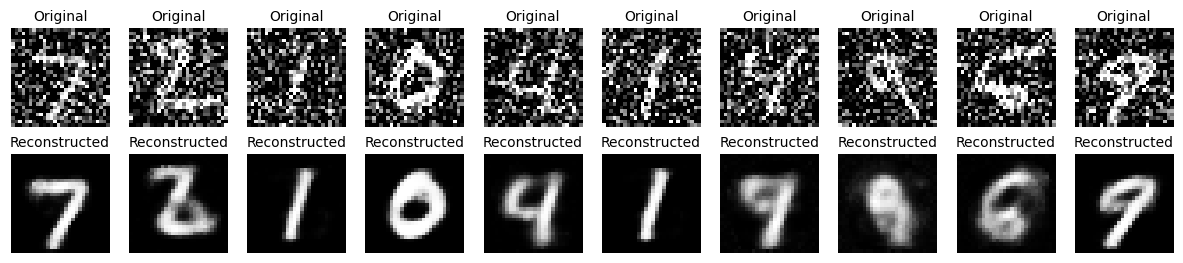

In [28]:
# visualize the noisy and reconstruction


reconstructed = denoise_autoencoder.predict(x_test[:10])

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
  axes[0, i].imshow(x_test_noisy[i].squeeze(), cmap='gray')
  axes[0, i].axis('off')
  axes[0, i].set_title('Original', fontsize=10)

  axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
  axes[1, i].axis('off')
  axes[1, i].set_title('Reconstructed', fontsize=10)

plt.show()